In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 모델링

In [2]:
df_pre = pd.read_csv('data/df_pre.csv')
print(np.shape(df_pre))
df_pre.tail()

(26729, 23)


,Unnamed: 0,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


In [3]:
del df_pre['Unnamed: 0']

In [4]:
print(np.shape(df_pre))
df_pre.tail()

(26729, 22)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


# Random Forest (전체 feature importances) 

In [55]:
columns = ['Name', 'DateTime','AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color', 'Color_pre', 'DayuponOutcome','AboutAge','BreedMix','Breed_pre','Year','Month','YearMonth','Season','Quarter','Group','Size']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

train score: 0.9999532338773792
test score: 0.6339319117096894
log loss: 1.1270379786227118



Feature ranking:
0. feature 3 (0.144489)
1. feature 1 (0.143573)
2. feature 8 (0.099903)
3. feature 6 (0.088492)
4. feature 5 (0.056139)
5. feature 7 (0.054242)
6. feature 14 (0.052604)
7. feature 4 (0.052602)
8. feature 0 (0.050481)
9. feature 13 (0.045377)
10. feature 11 (0.041602)
11. feature 9 (0.033391)
12. feature 17 (0.031248)
13. feature 18 (0.027509)
14. feature 15 (0.021584)
15. feature 16 (0.019772)
16. feature 2 (0.015394)
17. feature 12 (0.014438)
18. feature 10 (0.007160)


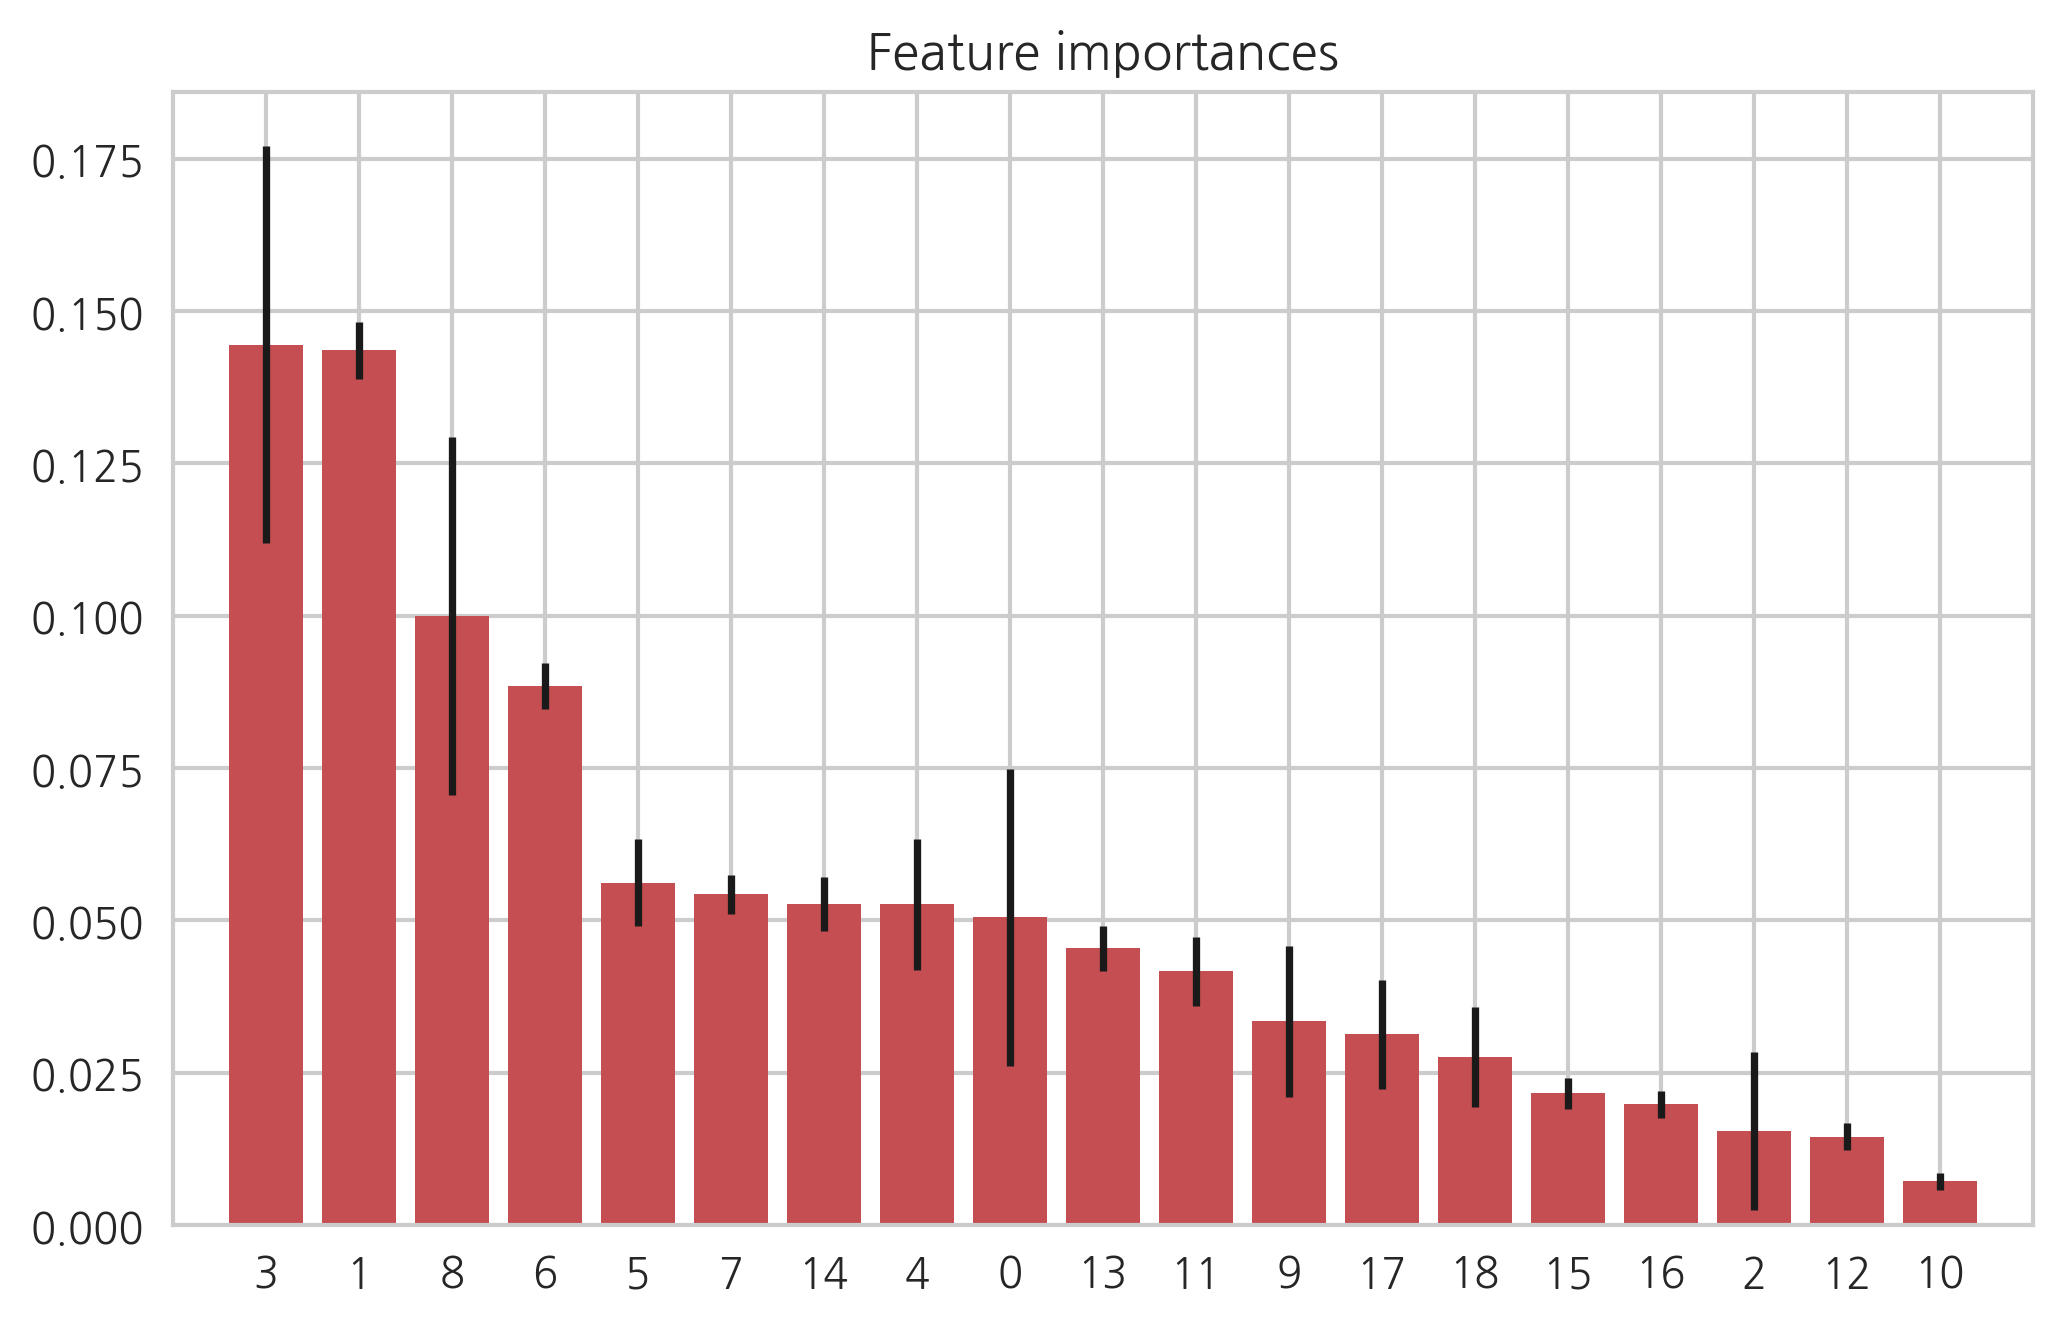

In [27]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(df_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

# Random Forest 

- feature importance mean 기준으로 0.05이상인 변수만 사용하였을때
- ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

In [28]:
df_x.iloc[0, [3,1,8,6,5,7,14]]

SexuponOutcome       2
DateTime          3361
DayuponOutcome     365
Color              130
Breed             1221
Color_pre            2
YearMonth            4
Name: 0, dtype: int64

In [35]:
columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


train score: 1.0
test score: 0.6187803965581743
log loss: 1.023825195966725



# Random Forest 

- 1 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

In [54]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8011036804938503
test score: 0.5555555555555556
log loss: 1.8783832389364936



- 2 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month']

In [55]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8735911705560492
test score: 0.5589225589225589
log loss: 1.7170981928568472



- 3 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth']

In [56]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.9155871486695039
test score: 0.5632248410026188
log loss: 1.5379631569883232



- 4 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season']

In [57]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8146658560538745
test score: 0.5538720538720538
log loss: 1.9324877419822



- 5 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter']

In [58]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8142917270729084
test score: 0.5544332210998878
log loss: 1.987696300439277



- 6 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

In [5]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7025206940092596
test score: 0.5284324728769173
log loss: 1.969618631399007



- 7 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

In [8]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7749146518262171
test score: 0.5145903479236813
log loss: 1.9821968064766362



- 8 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

In [7]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8252817658887902
test score: 0.5216984661429106
log loss: 1.9294567976580403



- 9 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

In [9]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7130898377215545
test score: 0.5198279087167976
log loss: 1.9335018433205342



- 10 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

In [10]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7138380956834869
test score: 0.5200149644594089
log loss: 1.9571902704406532



- 11 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

In [11]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8011036804938503
test score: 0.5591096146651702
log loss: 1.906976682291443



- 12 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

In [12]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8735911705560492
test score: 0.5679012345679012
log loss: 1.7606278281994434



- 13 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

In [13]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.9155871486695039
test score: 0.5714552936775159
log loss: 1.5198682544580564



# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

model = LogisticRegression().fit(X_train, y_train)
model_probs = model.predict_proba(X_test)

print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train score: 0.54594771547491
test score: 0.5443322109988776
log loss: 1.0671751149468862



# Gradient Boosting 

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

model_grad = GradientBoostingClassifier(n_estimators=300, random_state=0).fit(X_train, y_train)
model_probs = model_grad.predict_proba(X_test)

print('train score: {}'.format(model_grad.score(X_train, y_train)))
print('test score: {}'.format(model_grad.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train score: 0.6875087686479914
test score: 0.6490834268612047
log loss: 0.8619394471290229



# XGBoost 

In [16]:
for_esti = np.linspace(100, 1000, 10)
for_esti

array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.])

- 적당한 test size 탐색

In [21]:
import xgboost
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]
for_cv = np.linspace(0.1, 0.9, 9)
for i in for_cv:
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=i, random_state=0, shuffle=True)

    model_xgb = xgboost.XGBClassifier(n_estimators=100).fit(X_train, y_train)
    model_probs = model_xgb.predict_proba(X_test)
    print('test size = ', i, '\n')
    print('train score: {}'.format(model_xgb.score(X_train, y_train)))
    print('test score: {}'.format(model_xgb.score(X_test, y_test)))
    print('log loss: {}'.format(log_loss(y_test, model_probs)))
    print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.1 

train score: 0.6398819421350183
test score: 0.6419753086419753
log loss: 0.8584692757318875



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.2 

train score: 0.6391525978581116
test score: 0.6382341937897493
log loss: 0.8690102129538425



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.3 

train score: 0.6397113842864778
test score: 0.6342436712807084
log loss: 0.874277539621174



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.4 

train score: 0.6420776953295504
test score: 0.6317807706696595
log loss: 0.8821911941903682



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.5 

train score: 0.6419485184076624
test score: 0.6325476992143659
log loss: 0.8845794344488831



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.6 

train score: 0.6414741371246843
test score: 0.6312507793989276
log loss: 0.8845947605434283



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.7 

train score: 0.6460463956098778
test score: 0.6312864090641869
log loss: 0.8870670542910948



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.8 

train score: 0.65088868101029
test score: 0.6280864197530864
log loss: 0.8906287524673747



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test size =  0.9 

train score: 0.6669161676646707
test score: 0.6270939851186764
log loss: 0.9033275880462287



- 적당한 n_estimators 탐색

In [25]:
import xgboost
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

#100
model_xgb = xgboost.XGBClassifier(n_estimators=100).fit(X_train, y_train)
model_probs = model_xgb.predict_proba(X_test)
print('n_estimators = 100', '\n')
print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

#300
model_xgb = xgboost.XGBClassifier(n_estimators=300).fit(X_train, y_train)
model_probs = model_xgb.predict_proba(X_test)
print('n_estimators = 300', '\n')
print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

#500
model_xgb = xgboost.XGBClassifier(n_estimators=500).fit(X_train, y_train)
model_probs = model_xgb.predict_proba(X_test)
print('n_estimators = 500', '\n')
print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

#800
model_xgb = xgboost.XGBClassifier(n_estimators=800).fit(X_train, y_train)
model_probs = model_xgb.predict_proba(X_test)
print('n_estimators = 800', '\n')
print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

#1000
model_xgb = xgboost.XGBClassifier(n_estimators=1000).fit(X_train, y_train)
model_probs = model_xgb.predict_proba(X_test)
print('n_estimators = 1000', '\n')
print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators = 100 

train score: 0.6398819421350183
test score: 0.6419753086419753
log loss: 0.8584692757318875



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators = 300 

train score: 0.659669105420685
test score: 0.652450430228208
log loss: 0.8412142223276106



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators = 500 

train score: 0.6750083139341536
test score: 0.6603067714178825
log loss: 0.8353168609863223



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators = 800 

train score: 0.6939225141336881
test score: 0.6625514403292181
log loss: 0.8293191188074623



/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators = 1000 

train score: 0.7062687063518457
test score: 0.6629255518144407
log loss: 0.8270973185087065



# Kernel SVM

In [ ]:
'''from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

model_SVC = SVC(C=2, kernel='linear').fit(X_train, y_train)
model_probs = model_SVC.predict_proba(X_test)

print('train score: {}'.format(model_SVC.score(X_train, y_train)))
print('test score: {}'.format(model_SVC.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()
'''

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Keras

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

df_x = df_pre[columns]
df_y = pd.DataFrame(LabelBinarizer().fit_transform(df_pre["OutcomeType"]), 
                    columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], index=df_pre.index)

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

In [83]:
print(df_y['Adoption'].value_counts())
print(df_y['Transfer'].value_counts())
print(df_y['Return_to_owner'].value_counts())
print(df_y['Euthanasia'].value_counts())
print(df_y['Died'].value_counts())

0    15960
1    10769
Name: Adoption, dtype: int64
0    17307
1     9422
Name: Transfer, dtype: int64
0    21943
1     4786
Name: Return_to_owner, dtype: int64
0    25174
1     1555
Name: Euthanasia, dtype: int64
0    26532
1      197
Name: Died, dtype: int64


In [87]:
X_train.describe()

,SexuponOutcome,DateTime,DayuponOutcome,Color,Breed,Month
count,24056.000000,24056.000000,24056.000000,24056.000000,24056.000000,24056.000000
mean,2.018291,11545.445336,792.755487,156.597190,691.322331,5.937188
std,1.072665,6553.301941,1080.501140,113.356627,292.577637,3.493082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5973.750000,60.000000,38.000000,593.750000,3.000000
50%,2.000000,11539.500000,365.000000,130.000000,640.000000,6.000000
75%,3.000000,17219.250000,1095.000000,274.000000,847.000000,9.000000
max,4.000000,22916.000000,7300.000000,365.000000,1379.000000,11.000000


In [85]:
X_train = np_utils.to_categorical(X_train, 6)
X_test = np_utils.to_categorical(X_test, 6)
y_train = np_utils.to_categorical(y_train, 5)
y_test = np_utils.to_categorical(y_test, 5)

IndexError: index 17175 is out of bounds for axis 1 with size 6

In [80]:
X_train

array([[ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.]])

In [73]:
X_train.shape

(601400, 6)

In [74]:
y_test.shape

(66825, 5)

In [72]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import regularizers
from keras.layers import Dropout

np.random.seed(0)

model = Sequential()
model.add(Dense(2, input_dim=6, activation="sigmoid", kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(5, activation="sigmoid", kernel_initializer="glorot_uniform"))
model.compile(optimizer=SGD(lr=0.2), loss='categorical_crossentropy', metrics=["accuracy"])

hist = model.fit(X_train, y_train, 
                 epochs=10, batch_size=50, 
                 validation_data=(X_test, y_test), verbose=2)

Train on 601400 samples, validate on 66825 samples
Epoch 1/10
10s - loss: 0.0421 - acc: 0.9925 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 2/10


KeyboardInterrupt: 

In [70]:
model_probs = model.predict_proba(X_test)

print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

10816/13365 [=======================>......] - ETA: 0s

AttributeError: 'Sequential' object has no attribute 'score'

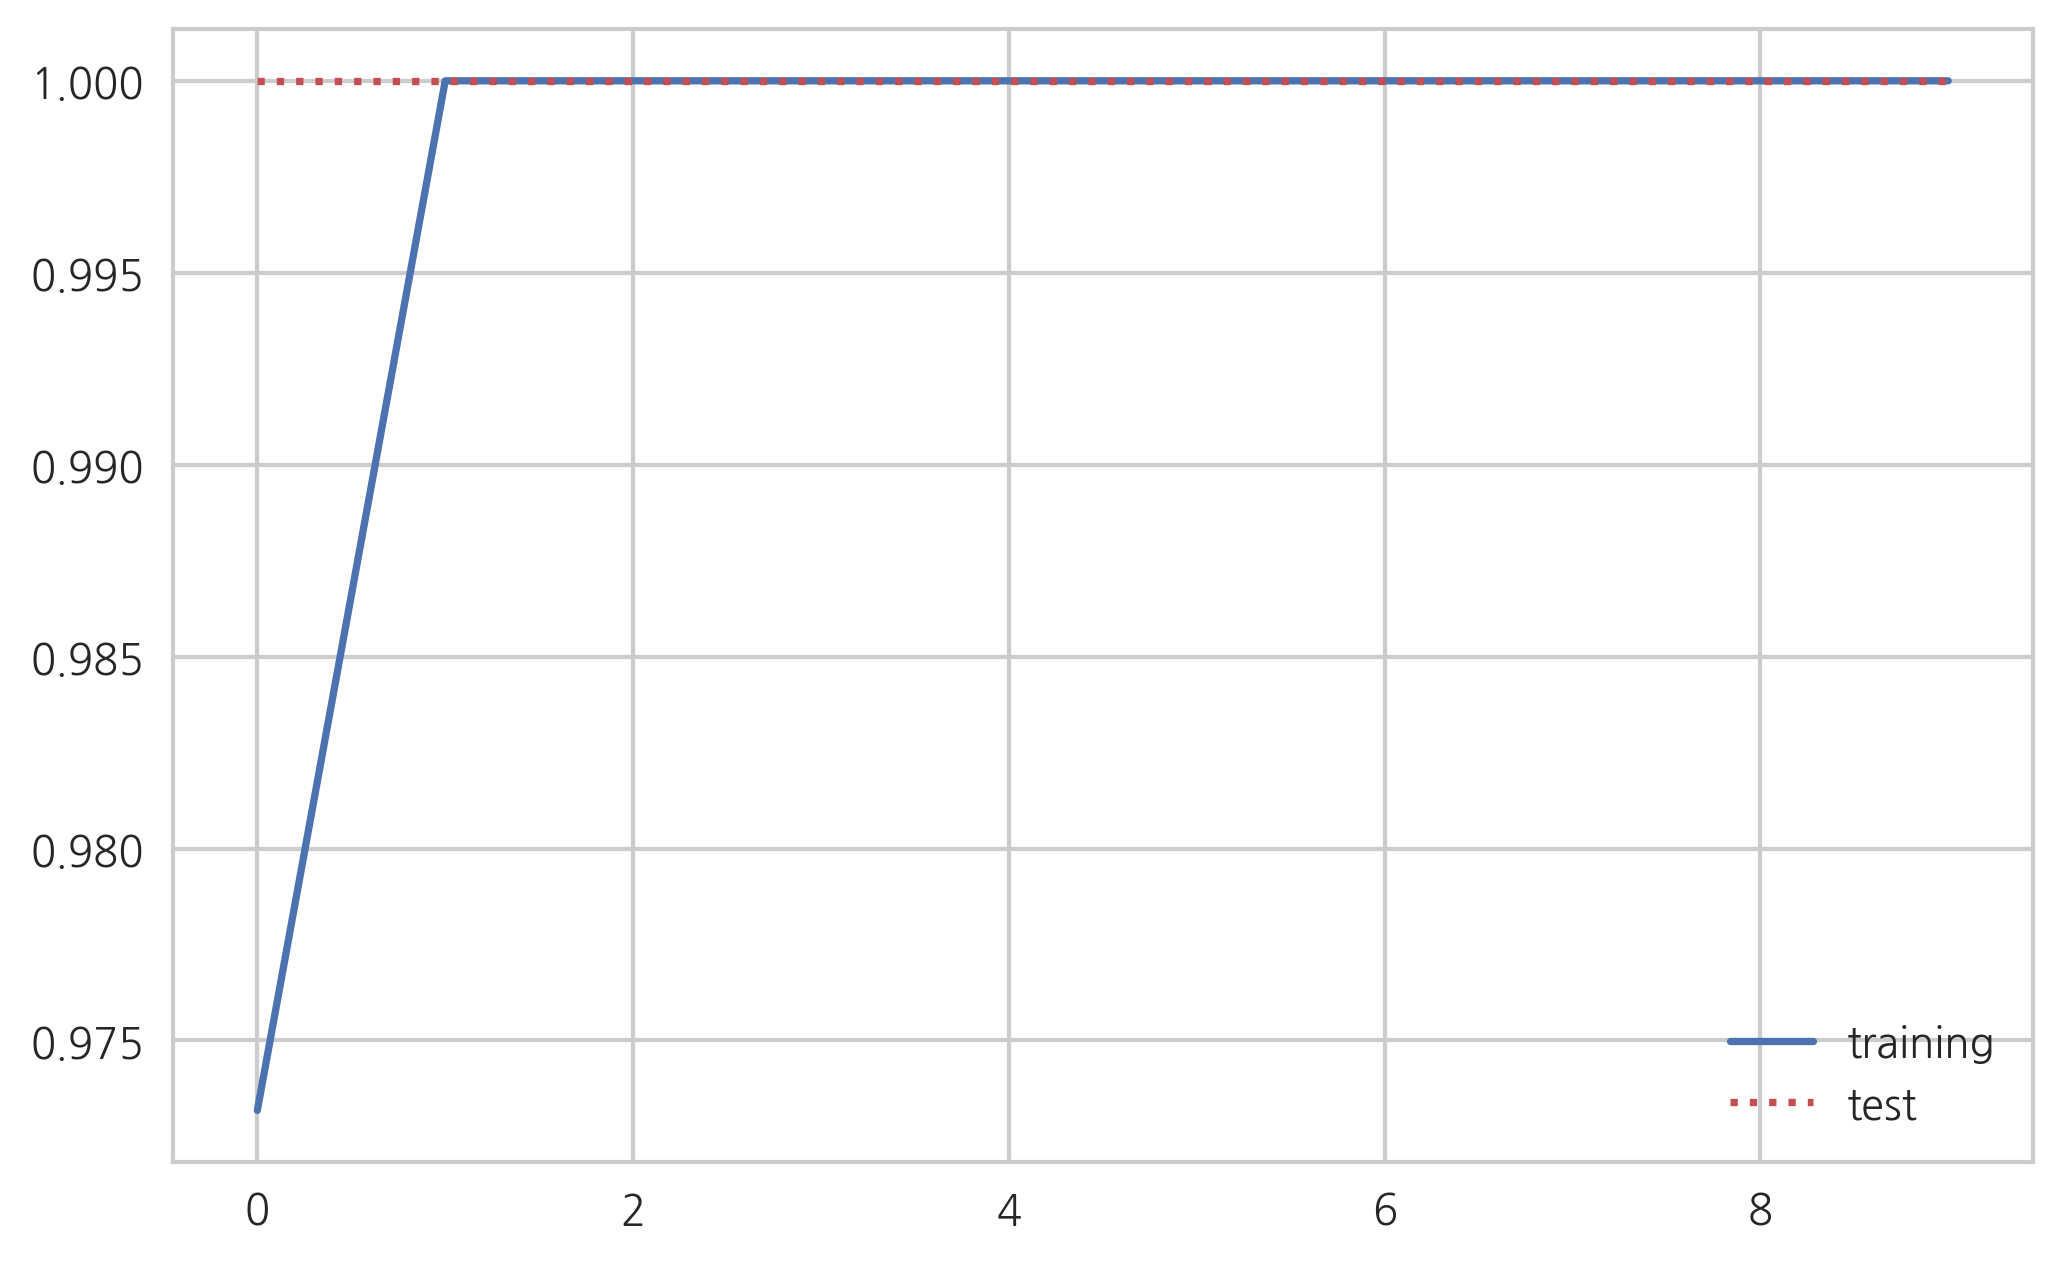

In [69]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()